<h2><center>Machine Learning Project 22-23</center></h2>
<center>Reza Gonabadi<center
<center>Zeinab Mohammadpour<center>

* First of all, We should import most needed library and package :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
# During the project we will add some necessary library 

 * Our dataset is in the CSV format and we use pandas function like read_csv to import data to our environment

In [2]:
Data = pd.read_csv(r'C:\Reza Gonabadi\Python Code\Polimi Project\assignment_part1\tyres_train.csv')
data = pd.DataFrame(Data)

In [3]:
#Importing The Test Set
tyres_test = pd.read_csv(r'C:\Reza Gonabadi\Python Code\Polimi Project\tyres_test.csv')
tyres_test = pd.DataFrame(tyres_test)
print("the test set size is : ", tyres_test.shape)

the test set size is :  (7984, 15)


* The basic things we should do are knowing about size of our data

In [4]:
data.shape

(3000, 16)

* As you can see we have 3000 rows which shows number of sample and 16 columns which shows features and labels of classes;
the next stepshould describe our data, what are our features and labels names and how they present in the dataset*

## Exploratory Data Analysis

In [5]:
#gives information about the data types,columns, null value counts, memory usage etc
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vulc             3000 non-null   float64
 1   perc_nat_rubber  3000 non-null   int64  
 2   wiring_strength  3000 non-null   int64  
 3   weather          3000 non-null   float64
 4   perc_imp         3000 non-null   float64
 5   temperature      3000 non-null   float64
 6   tread_type       3000 non-null   int64  
 7   tyre_season      3000 non-null   int64  
 8   elevation        3000 non-null   float64
 9   month            3000 non-null   int64  
 10  tread_depth      3000 non-null   int64  
 11  tyre_quality     3000 non-null   int64  
 12  perc_exp_comp    3000 non-null   float64
 13  diameter         890 non-null    float64
 14  add_layers       3000 non-null   int64  
 15  failure          3000 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 375.1 KB


In [6]:
data.isna().sum()

vulc                  0
perc_nat_rubber       0
wiring_strength       0
weather               0
perc_imp              0
temperature           0
tread_type            0
tyre_season           0
elevation             0
month                 0
tread_depth           0
tyre_quality          0
perc_exp_comp         0
diameter           2110
add_layers            0
failure               0
dtype: int64

In [7]:
#basic statistic details about the data
data.describe(include="all")

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,890.000000,3000.00000,3000.000000
mean,18.184712,31.249667,0.631333,0.282987,0.014550,-2.375360,1.618000,0.547667,376.184000,5.779667,1.212000,0.309667,5.79151,72.085393,0.92200,0.336000
std,1.587193,4.933300,0.546673,0.183252,0.014262,5.672184,1.487553,0.497806,151.149861,3.318954,1.153617,0.462433,0.41032,14.866264,0.36418,0.472418
min,12.312000,18.000000,0.000000,0.030000,0.000000,-19.280000,0.000000,0.000000,41.500000,0.000000,0.000000,0.000000,4.54000,42.600000,0.00000,0.000000
25%,17.241500,28.000000,0.000000,0.160000,0.010000,-6.960000,0.000000,0.000000,263.500000,3.000000,0.000000,0.000000,5.48000,59.200000,1.00000,0.000000
50%,17.834000,31.000000,1.000000,0.210000,0.010000,-2.080000,1.000000,1.000000,342.000000,6.000000,1.000000,0.000000,5.80000,71.650000,1.00000,0.000000
75%,18.934000,35.000000,1.000000,0.370000,0.020000,0.080000,3.000000,1.000000,471.625000,8.000000,2.000000,1.000000,6.08000,84.900000,1.00000,1.000000
max,29.932000,46.000000,2.000000,0.930000,0.050000,37.000000,4.000000,1.000000,939.500000,11.000000,3.000000,1.000000,7.21000,101.900000,2.00000,1.000000


* those two function (isna().sum() , info) show us number of null features in the dataset and the last 
function present dataset in rows and columns, so because the number of diameter feature has too much null number it would be better to remove this feature from our dataset and work with others*

* In the section below we remove column 'diameter' from our dataset*

In [8]:
data.drop(['diameter'], axis = 1, inplace=True)
tyres_test.drop(['diameter'], axis = 1, inplace=True)

In [9]:
# As you can see, the diameter feature was removed 
data.head(10)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,1,0
8,17.616,25,1,0.16,0.01,-6.88,0,1,103.5,8,0,1,5.32,1,0
9,17.370,34,0,0.27,0.01,-1.28,2,0,345.5,5,2,0,6.31,0,0


In [10]:
tyres_test.head(10)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers
0,17.180,30,1,0.21,0.00,-9.24,0,1,460.5,4,3,0,5.54,1
1,17.744,24,1,0.16,0.01,-9.12,0,1,278.5,8,0,1,5.01,1
2,16.930,34,0,0.27,0.01,3.64,2,0,733.5,11,2,0,6.41,1
3,22.428,34,1,0.03,0.00,0.56,3,0,235.5,9,3,0,5.95,1
4,16.818,29,1,0.06,0.00,-0.96,3,0,461.0,9,0,1,5.97,1
5,17.284,27,1,0.16,0.01,-11.76,4,0,251.5,7,0,1,5.30,1
6,20.050,32,1,0.30,0.01,-4.24,0,0,552.5,0,3,0,5.58,1
7,17.932,24,1,0.16,0.01,-7.48,0,1,283.5,8,0,1,5.23,1
8,16.486,33,1,0.62,0.05,-1.84,2,1,305.0,6,1,1,6.14,1
9,17.690,25,1,0.16,0.01,-8.56,0,1,385.5,8,0,1,5.96,1


<AxesSubplot: >

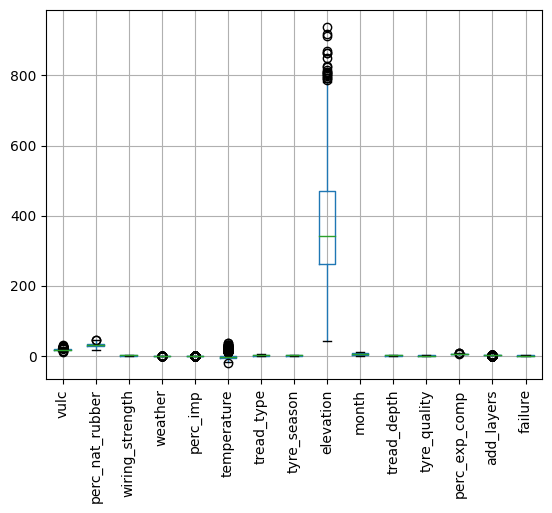

In [11]:
%matplotlib inline
data.boxplot(rot=90)

array([[<AxesSubplot: title={'center': 'vulc'}>,
        <AxesSubplot: title={'center': 'perc_nat_rubber'}>,
        <AxesSubplot: title={'center': 'wiring_strength'}>,
        <AxesSubplot: title={'center': 'weather'}>],
       [<AxesSubplot: title={'center': 'perc_imp'}>,
        <AxesSubplot: title={'center': 'temperature'}>,
        <AxesSubplot: title={'center': 'tread_type'}>,
        <AxesSubplot: title={'center': 'tyre_season'}>],
       [<AxesSubplot: title={'center': 'elevation'}>,
        <AxesSubplot: title={'center': 'month'}>,
        <AxesSubplot: title={'center': 'tread_depth'}>,
        <AxesSubplot: title={'center': 'tyre_quality'}>],
       [<AxesSubplot: title={'center': 'perc_exp_comp'}>,
        <AxesSubplot: title={'center': 'add_layers'}>,
        <AxesSubplot: title={'center': 'failure'}>, <AxesSubplot: >]],
      dtype=object)

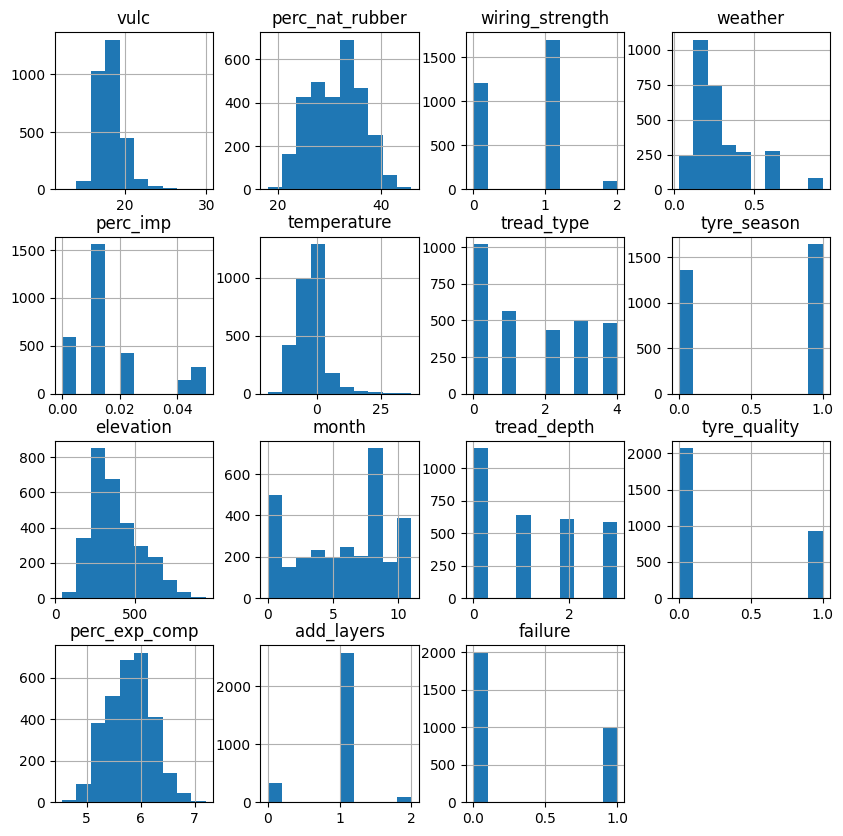

In [12]:
data.hist(figsize=(10,10))

failure
0    1992
1    1008
dtype: int64


<AxesSubplot: title={'center': 'Distribution of failure'}, xlabel='failure'>

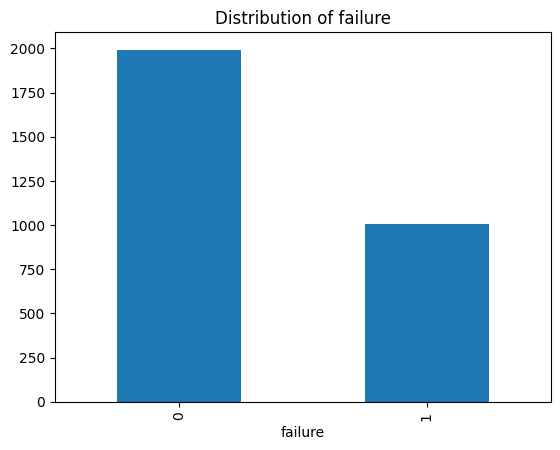

In [13]:
#Print class freq. through pandas: we group the data by the column target and we count the number of rows 
target_dist=data.groupby('failure').size()
print(target_dist)

%matplotlib inline

#Visualize Class Counts
target_dist.plot.bar(x='',y='',title='Distribution of failure')

* the Distribution of failure above shows us that our cataset classes are noe well-balance so we will oversample the data in the next steps

## Data Preparation 

* We want to remove outliers in dataset using standard deviations technique
  in this section we remove every sample which its feature greater than 3 in STD

In [14]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

data = remove_outliers(data,['vulc','perc_nat_rubber','weather','temperature','perc_imp','wiring_strength','elevation','perc_exp_comp'],3)
# data.failure.value_counts()

Working on column: vulc
Working on column: perc_nat_rubber
Working on column: weather
Working on column: temperature
Working on column: perc_imp
Working on column: wiring_strength
Working on column: elevation
Working on column: perc_exp_comp


* As you see before our dataset was not well balanced in classes, so it would be better to oversample it first and then using it in our machines

In [15]:
from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
df_majority = data[data.failure==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = data[data.failure==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=1900,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df_oversampled.failure.value_counts() #"target" is the name of the target column, change it accordingly to your dataset

data = df_oversampled.copy()
data

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure
1677,16.384,33,0,0.37,0.02,-0.48,0,0,242.0,9,0,0,5.61,1,1
1192,17.628,26,0,0.62,0.05,9.12,1,1,314.5,10,3,0,6.51,0,1
1248,19.524,24,1,0.38,0.04,6.88,2,1,449.0,1,2,0,6.39,1,1
1045,16.968,33,0,0.37,0.02,-0.12,3,0,526.0,1,1,0,6.18,1,1
291,19.884,34,1,0.38,0.04,-1.16,3,0,146.0,8,1,0,6.30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,17.860,21,1,0.16,0.01,-6.48,0,1,336.5,8,0,1,5.85,1,0
2994,19.298,29,1,0.03,0.00,-1.00,2,1,167.5,8,0,0,5.82,2,0
2997,16.170,33,1,0.39,0.01,-3.44,1,0,235.0,8,3,1,5.57,0,0
2998,18.872,37,0,0.03,0.00,-0.76,4,0,290.0,11,0,0,5.89,0,0


* We seperte X , y from dataset X means our features and y means our labels

In [16]:
X = data.drop(['failure'],axis=1)
 
y = data.failure.values 

* One on the important thing before classification and every machine learning problem is Normalizing data, so we normalize the data in the next step

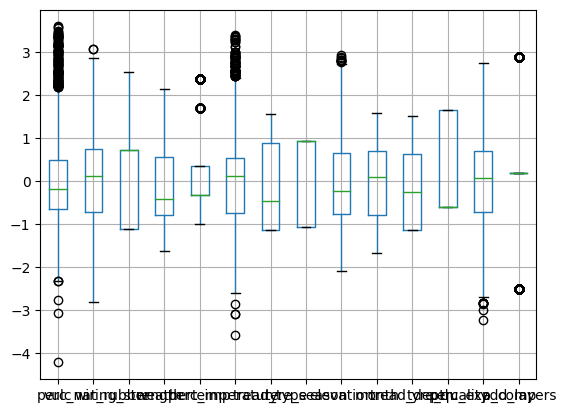

In [17]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

scaler_tyres = StandardScaler().fit(tyres_test)

# We compute the scaler
scaled_data = scaler.transform(X.astype(float))
scaled_X = pd.DataFrame(scaled_data.astype(float))
scaled_X.columns = X.columns

scaled_tyres_test_data = scaler_tyres.transform(tyres_test.astype(float))
scaled_tyres_test = pd.DataFrame(scaled_tyres_test_data.astype(float))
scaled_tyres_test.columns = X.columns

scaled_X.boxplot()
# scaled_tyres_test.boxplot()

X = scaled_X.copy()
tyres_test = scaled_tyres_test.copy()


In [18]:
tyres_test.shape

(7984, 14)

In [19]:
X

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers
0,-1.220108,0.338219,-1.114479,0.549167,0.349774,0.375608,-1.144667,-1.064686,-0.880782,0.986629,-1.136729,-0.606884,-0.503293,0.183780
1,-0.306383,-1.129147,-1.114479,2.140485,2.374484,2.398950,-0.470941,0.939244,-0.405299,1.282640,1.506217,-0.606884,1.782631,-2.505579
2,1.086240,-1.548395,0.715462,0.612820,1.699581,1.926837,0.202786,0.939244,0.476803,-1.381465,0.625235,-0.606884,1.477841,0.183780
3,-0.791156,0.338219,-1.114479,0.549167,0.349774,0.451483,0.876512,-1.064686,0.981799,-1.381465,-0.255747,-0.606884,0.944459,0.183780
4,1.350662,0.547843,0.715462,0.612820,1.699581,0.232288,0.876512,-1.064686,-1.510386,0.690617,-0.255747,-0.606884,1.249249,-2.505579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,-0.135977,-2.177266,0.715462,-0.787541,-0.325130,-0.888981,-1.144667,0.939244,-0.261015,0.690617,-1.136729,1.647761,0.106287,0.183780
3830,0.920242,-0.500276,0.715462,-1.615026,-1.000033,0.266010,0.202786,0.939244,-1.369381,0.690617,-1.136729,-0.606884,0.030089,2.873139
3831,-1.377292,0.338219,0.715462,0.676472,-0.325130,-0.248256,-0.470941,-1.064686,-0.926690,0.690617,1.506217,1.647761,-0.604889,-2.505579
3832,0.607342,1.176714,-1.114479,-1.615026,-1.000033,0.316594,1.550239,-1.064686,-0.565979,1.578652,-1.136729,-0.606884,0.207884,-2.505579


* As you can see above our dataset is normalize now and we can use it in our machines

* Now we seperate The data into Train and Test which we could use in our machine

In [20]:
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,  #X_scaled
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(2683, 14)


## SVM

* We tried lots of machines and after all we decided to use SVM because it is more reliable and has more score from other ones

* We use Grid Sreach for finding best parameters in SVM inputs and after finding best parameters we use them in our machines

In [21]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf','polinomial'], "C":[0.1,1,100],"gamma":[1], "degree":[2,3,4]}

In [22]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [23]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\Reza.Gonabadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Reza.Gonabadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Reza.Gonabadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\Reza.Gonabadi\AppData\Local\Programs\Python\Python311\Lib\sit

In [24]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.777330 using {'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
0.723492 (0.006207) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
0.723221 (0.000870) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'polinomial'}
0.723492 (0.006207) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'linear'}
0.723221 (0.000870) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'polinomial'}
0.723492 (0.006207) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'linear'}
0.723221 (0.000870) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'polinomial'}
0.725227 (0.004027) with: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
0.774696 (0.015731) with: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 1, 'd

In [25]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

y_tyres_test = best_model.predict(tyres_test)


In [26]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score


print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  1.0
--
***RESULTS ON TEST SET***
f1_score:  0.8576923076923076


## As you can see the f1 score in test set data is 85% and in train set is 100% 

In [27]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       581
           1       0.95      0.78      0.86       570

    accuracy                           0.87      1151
   macro avg       0.88      0.87      0.87      1151
weighted avg       0.88      0.87      0.87      1151



In [28]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[557  24]
 [124 446]]


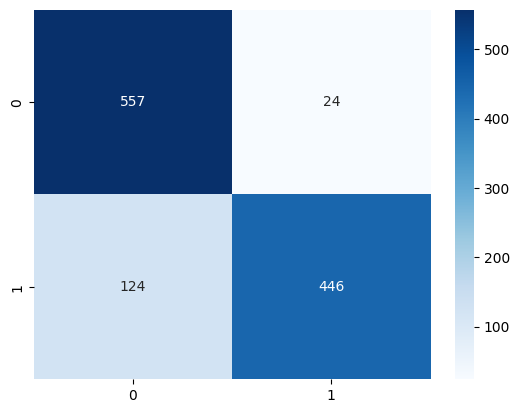

In [29]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format

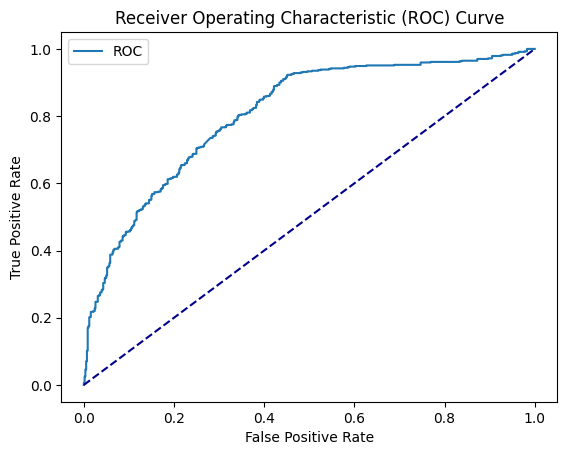

AUC: 0.81


In [30]:
from sklearn import metrics

model = SVC(C=0.1, gamma=0.0001, kernel='linear',probability=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

* We use all 14 features in our machine. It would be better if we apply feauter selection technique to reduce size of the features. In that way our machine would learn faster and better than using all 14 features.

## Apply PCA

In [31]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_X)
df_pca = pd.DataFrame(pca.transform(scaled_X))

pca_tyres_test = PCA()
pca_tyres_test.fit(tyres_test)
df_pca_tyres_test = pd.DataFrame(pca_tyres_test.transform(tyres_test))

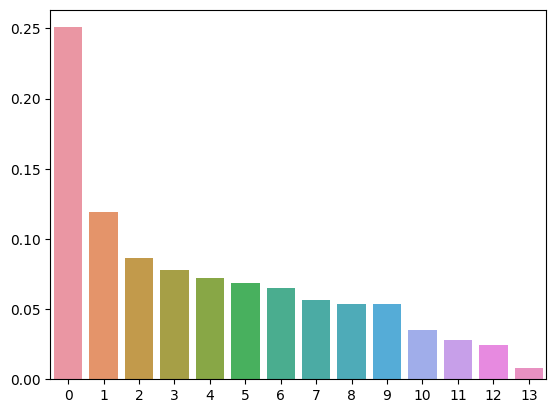

In [32]:
explained_variance=pd.DataFrame(pca.explained_variance_ratio_)
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_variance.transpose())

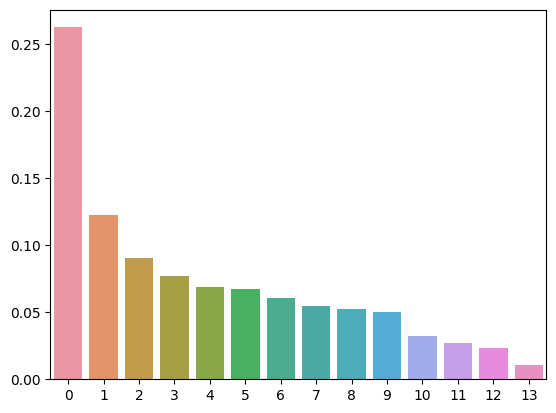

In [33]:
explained_variance_tyres=pd.DataFrame(pca_tyres_test.explained_variance_ratio_)
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_variance_tyres.transpose())

* Based on this plot I believe that the first 6 pca's are enough for choosing in our machine

In [34]:
pd.DataFrame(pca.components_,columns=X.columns)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers
0,-0.068478,0.314061,-0.186414,0.355673,0.255935,0.400677,0.243082,-0.179504,0.125813,-0.147174,0.223329,-0.424722,0.387668,-0.005244
1,-0.318820,-0.314747,0.212791,0.444360,0.515069,0.080814,-0.169973,0.346527,-0.001655,0.116982,-0.203210,0.110539,0.023414,0.260777
2,0.603934,-0.074155,0.342172,0.259703,0.370231,-0.141793,0.054388,-0.251715,0.105962,0.055998,0.061551,0.145804,-0.050091,-0.424054
3,-0.031871,-0.316511,0.603494,-0.228791,-0.295907,0.374409,-0.080074,0.078618,0.092600,0.106116,0.098035,-0.180802,0.399643,-0.141668
4,-0.196049,-0.026206,-0.209736,-0.055748,-0.012506,-0.055157,0.094289,-0.018368,0.760774,0.522934,-0.102460,0.019625,-0.035918,-0.192211
5,-0.115457,0.142002,-0.221883,0.061045,0.021604,0.140607,-0.508125,-0.111351,-0.412645,0.370754,-0.233322,-0.082514,0.121401,-0.488876
6,0.067273,0.026721,0.063559,0.020762,0.016635,-0.019508,0.041356,-0.225939,-0.254191,0.657669,0.506216,0.014897,-0.057011,0.424270
7,0.227963,0.043501,0.076921,-0.032865,-0.038475,0.088803,-0.202644,-0.516069,0.139513,0.012869,-0.589317,-0.080004,0.111923,0.486347
8,0.198979,0.086795,0.021021,0.001516,-0.060888,0.026925,0.651920,0.319484,-0.292277,0.317021,-0.463420,-0.106167,0.090561,-0.027731
9,0.497395,0.345737,-0.054672,0.023918,-0.056856,-0.018146,-0.405003,0.585084,0.203763,0.075259,0.080533,-0.142300,0.103369,0.187047


In [35]:
X_pca = pd.DataFrame(data = pca.transform(X)
             ,columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8', 'pc9','pc10','pc11','pc12', 'pc13','pc14'])

X_train_pca = pd.DataFrame(data = pca.transform(X_train)
             ,columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8', 'pc9','pc10','pc11','pc12', 'pc13','pc14'])

X_test_pca = pd.DataFrame(data = pca.transform(X_test)
             ,columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8', 'pc9','pc10','pc11','pc12', 'pc13','pc14'])

tyres_test_pca = pd.DataFrame(data = pca_tyres_test.transform(tyres_test)
             ,columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8', 'pc9','pc10','pc11','pc12', 'pc13','pc14'])

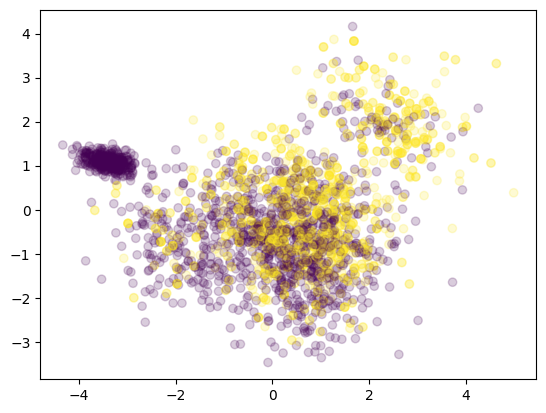

In [36]:
import matplotlib.pyplot as plt

x = X_train_pca.iloc[:,0]
y = X_train_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_train )
plt.show()

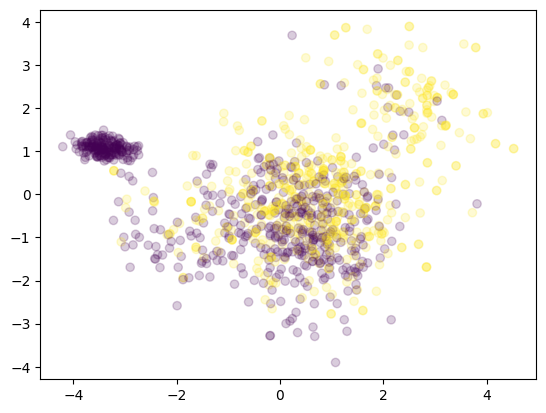

In [37]:
import matplotlib.pyplot as plt

x = X_test_pca.iloc[:,0]
y = X_test_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_test )
plt.show()

### Using  6 PC's for the Machines

In [38]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf','polinomial'], "C":[0.1,1,100],"gamma":[1], "degree":[2,3,4]}

#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [39]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train_pca.iloc[:,:6], y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\Reza.Gonabadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Reza.Gonabadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Reza.Gonabadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\Reza.Gonabadi\AppData\Local\Programs\Python\Python311\Lib\sit

In [40]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.778840 using {'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
0.683551 (0.005481) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
0.723810 (0.002364) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'polinomial'}
0.683551 (0.005481) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'linear'}
0.723810 (0.002364) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'polinomial'}
0.683551 (0.005481) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'linear'}
0.723810 (0.002364) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'polinomial'}
0.685512 (0.006622) with: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
0.778506 (0.017438) with: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 1, 'd

In [48]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_pca.iloc[:,:6])

y_pred_train = best_model.predict(X_train_pca.iloc[:,:6])

y_tyres_test_result = best_model.predict(tyres_test_pca.iloc[:,:6])

In [49]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score


print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  1.0
--
***RESULTS ON TEST SET***
f1_score:  0.8266666666666668


## As you can see the f1 score in the test set data is 82.7% and in the train set is 100%,  and I consider this as a final score of this project.

In [50]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       581
           1       0.79      0.87      0.83       570

    accuracy                           0.82      1151
   macro avg       0.82      0.82      0.82      1151
weighted avg       0.82      0.82      0.82      1151



In [51]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[447 134]
 [ 74 496]]


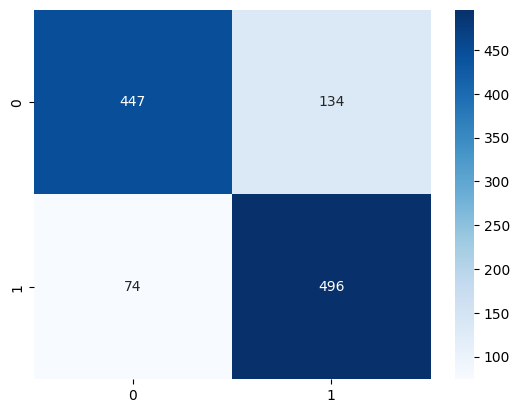

In [52]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format

In [57]:
count = (y_tyres_test_result == 1).sum()
count

2529

In [59]:
arr = y_tyres_test_result
int_array = arr.astype('int')

np.savetxt("result.txt", int_array)